# Linear Regresion

In [1]:
# Make sure we have all what we need installed
!pip install statsmodels
!pip install seaborn

## Dataset

### Top 50 Profit Startups

- This dataset was obtained from: https://www.kaggle.com/karthickveerakumar/startup-logistic-regression
- Contains the best startups based on their profit

### Reading the dataset
First import Pandas

In [2]:
import pandas as pd

Read the csv with `pd.read_csv()`

In [3]:
startups_df = pd.read_csv('./50_Startups.csv')

See what it contains

In [4]:
startups_df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups_df.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

### Statsmodels 

import needed libraries

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Let's see the correlation between the 3 columns and the profit

#### Marketing Spending VS Profit
- **R squared**: 0.55 
    - 55% of **Profit** is explainable by **Marketing**
- **P value**: 4.8e-10
    - Less than 0.05 (Reject the `null hypotesis`)

In [7]:
marketing_results = ols("Marketing_Spend ~ Profit", data=startups_df).fit()
marketing_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Marketing_Spend   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        20:14:13   Log-Likelihood:                -635.67
No. Observations:                  50   AIC:                             1275.
Df Residuals:                      48   BIC:                             1279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.31e+04   3.46e+04     -1.247      0.219   -1.13e+05    2.64e+04
Profit         2.2687      0.291      7.803      0.000       1.684       2.853
==============================================================================
Omnibus:                        3.843   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.310
Skew:                          -0.255   Prob(JB):                        0.191
Kurtosis:                       4.152   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Research and Development VS Profit
- **R squared**: 0.947
    - 94.7% of **Profit** is explainable by **Research and Development** spending
- **P value**: 3.50e-32
    - Much less than 0.05 (Reject the `null hypotesis`)
    
R&D has the highest correlation

In [8]:
rd_results = ols("RD_Spend ~ Profit", data=startups_df).fit()
rd_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RD_Spend   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           3.50e-32
Time:                        20:14:14   Log-Likelihood:                -533.94
No. Observations:                  50   AIC:                             1072.
Df Residuals:                      48   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.039e+04   4519.428    -11.149      0.000   -5.95e+04   -4.13e+04
Profit         1.1080      0.038     29.151      0.000       1.032       1.184
==============================================================================
Omnibus:                        6.195   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.570
Skew:                           0.544   Prob(JB):                       0.0617
Kurtosis:                       4.220   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Administration VS Profit
- **R squared**: 0.020
    - Only 0.2% of **Profit** is explainable by **Administration** spending
- **P value**: 0.162
    - Higher than 0.05 (Valid `null hypotesis`)

This values have no correlation

In [9]:
adm_results = ols("Administration ~ Profit", data=startups_df).fit()
adm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 16 Jul 2021   Prob (F-statistic):              0.162
Time:                        20:14:14   Log-Likelihood:                -581.44
No. Observations:                  50   AIC:                             1167.
Df Residuals:                      48   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.057e+05   1.17e+04      9.045      0.000    8.22e+04    1.29e+05
Profit         0.1395      0.098      1.419      0.162      -0.058       0.337
==============================================================================
Omnibus:                        0.990   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.930
Skew:                          -0.314   Prob(JB):                        0.628
Kurtosis:                       2.772   Cond. No.                     3.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plots

Plot the dataframe to see if we can see any correlation by eye
- Notice tha R&D behaves similar to Profit, while Administration and Marketing spending don't

<AxesSubplot:>

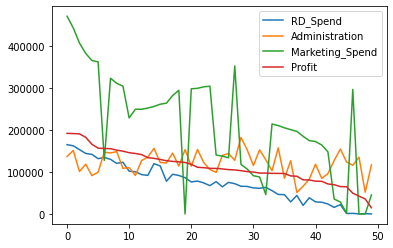

In [10]:
startups_df.sort_values('Profit').plot()

### SNS plots

Let's import Seaborn and set a darkgrid style. For more info about styles: https://www.python-graph-gallery.com/104-seaborn-themes

In [11]:
import seaborn as sns
sns.set_style("darkgrid")

#### R&D Spending VS Profit

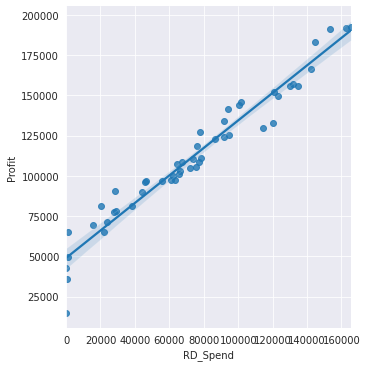

In [12]:
sns.lmplot(x='RD_Spend', y='Profit', data=startups_df)

#### Administration VS Profit

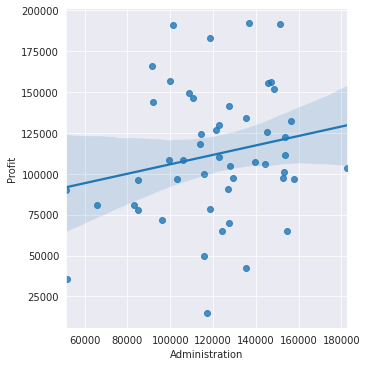

In [13]:
sns.lmplot(x='Administration', y='Profit', data=startups_df)

#### Marketing Spending VS Profit

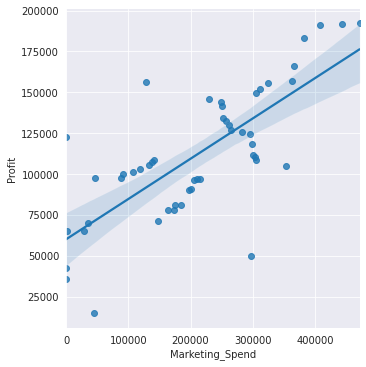

In [14]:
sns.lmplot(x='Marketing_Spend', y='Profit', data=startups_df)